https://math.nyu.edu/~avellane/HighFrequencyTrading.pdf
Идея стратегии проста: корректируем `mid price` на ту, что в данный момент "эффективнее" - если портфель большой, то хотим избавиться от активов и готовы продавать подешевле; аналогично наоборот.

In [14]:
%load_ext autoreload
%autoreload 2

from simulator import Sim
from strategy import BestPosStrategy
from get_info import get_pnl
from load_data import load_md_from_file
from stoikov import StoikovStrategy

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

PATH_TO_FILE = '../md/btcusdt:Binance:LinearPerpetual/'
NROWS = 3_000_00

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
md = load_md_from_file(path=PATH_TO_FILE, nrows=NROWS)

In [16]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = Sim(md, latency, md_latency)

In [17]:
#delay between orders
delay = pd.Timedelta(0.1, 's').delta
hold_time = pd.Timedelta(0.1, 's').delta
# risk ratio
gamma = 0.1
# time horizon
T_0 = md[0].receive_ts
T = md[-1].receive_ts

sigma = 2
intensity = 1.75
stoikov = StoikovStrategy(gamma, sigma, intensity, T_0, T, delay, hold_time)

In [18]:
%time trades_list, md_list, updates_list, all_orders = stoikov.run(sim)

CPU times: user 7.6 s, sys: 19.5 ms, total: 7.62 s
Wall time: 7.62 s


In [19]:
%time df = get_pnl(updates_list)

CPU times: user 31.2 s, sys: 23.3 ms, total: 31.2 s
Wall time: 31.2 s


In [20]:
dt = pd.to_datetime(df.receive_ts)

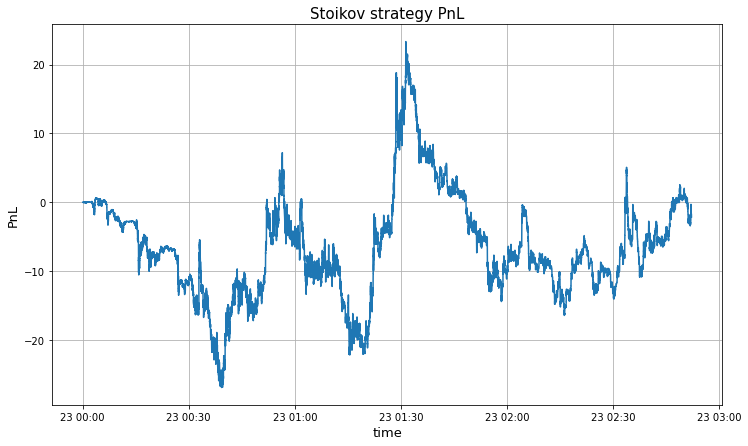

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("Stoikov strategy PnL", fontsize=15)
plt.grid()
plt.show();

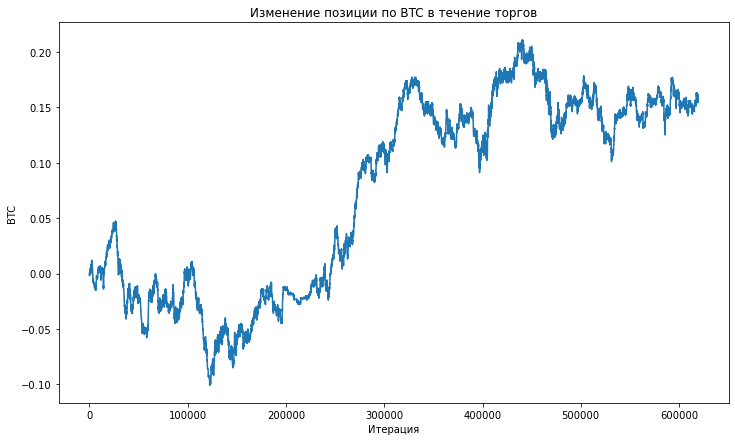

In [22]:
plt.figure(figsize=(12, 7))

plt.plot(np.arange(df['BTC'].shape[0]), df['BTC'])
plt.title('Изменение позиции по BTC в течение торгов')
plt.xlabel('Итерация')
plt.ylabel('BTC');